# Palmer Penguins Modeling

Elizabeth Berry

GSB 544-01

11/3/23

In [33]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

penguins_data = pd.get_dummies(penguins, columns=["species", "sex", "island"])
penguins_data = penguins_data.dropna()
penguins_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,2007,1,0,0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,2007,1,0,0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,1,0,0,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotnine import *

X = penguins_data[penguins_data.columns.difference(['bill_depth_mm'])]  # All columns except 'bill_depth_mm'
y = penguins_data['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = [
    ['bill_length_mm'],
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    ['species_Adelie', 'species_Chinstrap', 'species_Gentoo'],
    ['sex_female', 'sex_male', 'island_Biscoe', 'island_Dream', 'island_Torgersen'],
    X_train.columns.tolist()
]

training_errors = []
testing_errors = []

for vars in models:
    lr = LinearRegression()
    lr.fit(X_train[vars], y_train)
    training_errors.append(mean_squared_error(y_train, lr.predict(X_train[vars])))
    testing_errors.append(mean_squared_error(y_test, lr.predict(X_test[vars])))
    print(f'MSE for Testing Data with predictors {vars}: {mean_squared_error(y_test, lr.predict(X_test[vars]))}')

MSE for Testing Data with predictors ['bill_length_mm']: 3.7881927418450436
MSE for Testing Data with predictors ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']: 2.4273388578072486
MSE for Testing Data with predictors ['species_Adelie', 'species_Chinstrap', 'species_Gentoo']: 1.2438242073946215
MSE for Testing Data with predictors ['sex_female', 'sex_male', 'island_Biscoe', 'island_Dream', 'island_Torgersen']: 1.9892210210755807
MSE for Testing Data with predictors ['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo', 'year']: 0.6168724493143297


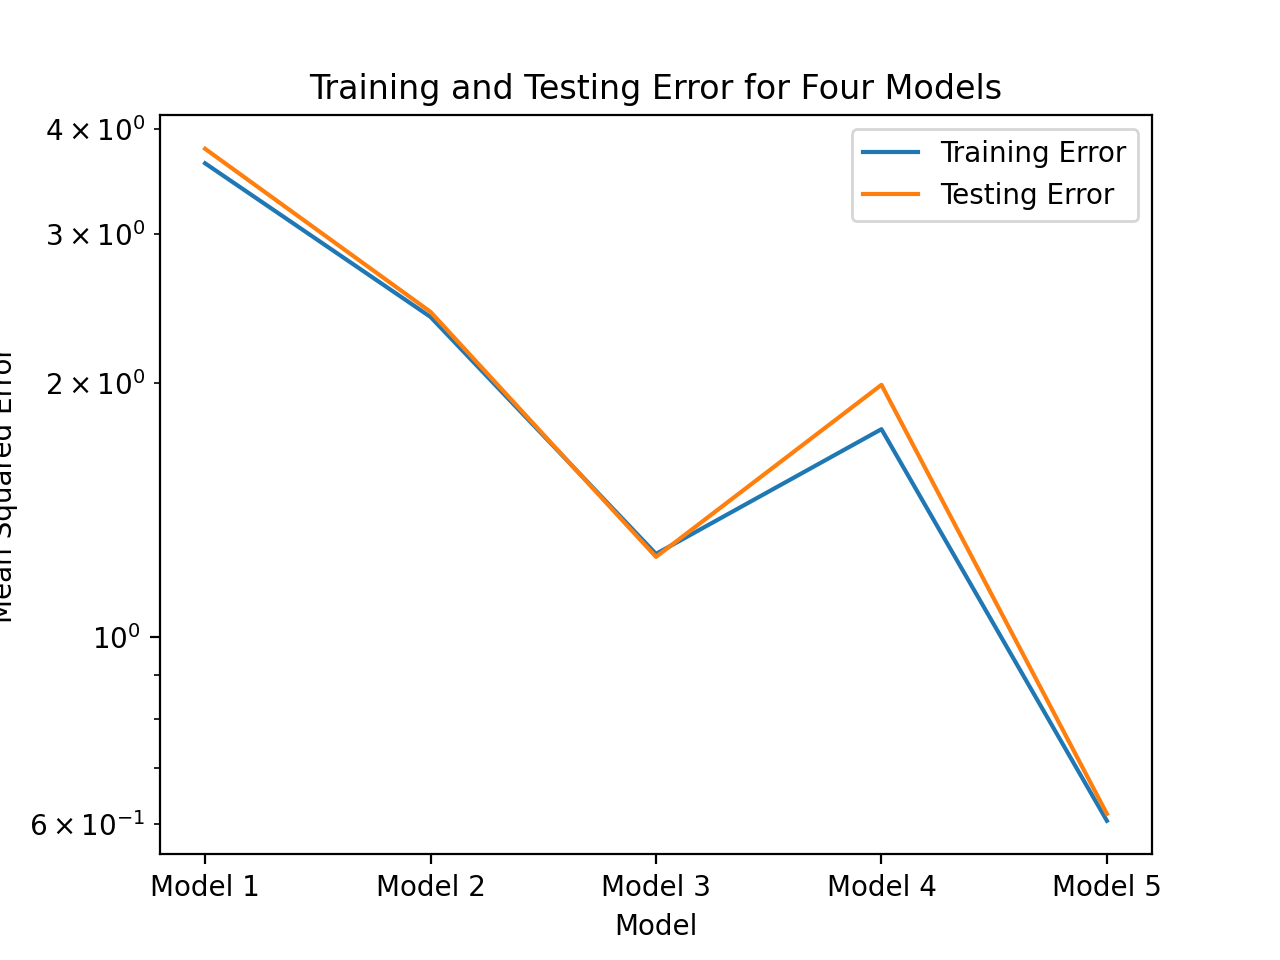

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, len(models) + 1), training_errors, label='Training Error')
plt.plot(range(1, len(models) + 1), testing_errors, label='Testing Error')
plt.xticks(ticks=range(1, len(models) + 1), labels=[f'Model {i}' for i in range(1, len(models) + 1)])
plt.legend()
plt.title('Training and Testing Error for Four Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.yscale('log')
plt.show()

Model 5 performs the best with the lowest MSE compared to the other 4 models. It's error is only slightly higher than the training error. Model 5 includes all variables other than bill_depth_mm.